In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.SVCDSeg.SVCD import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [2]:
KEA_IMAGE_PATH = r".\data\github\kea.jpg"
KEA_SCRIBBLE_PATH = r".\data\github\kea_scribble.png"


In [3]:
sample_image_kea = TargetImage(KEA_IMAGE_PATH)
sample_scribble_kea = EncodedScribble(
    KEA_SCRIBBLE_PATH, 
    is_xml = 2
)

In [4]:
n_classes = sample_scribble_kea.get_n_classes()

In [5]:
segmenter = SVCDSeg(
    n_classes,
    max_iter = 2500,
    debug = 0,
    transpose = True
)

In [6]:
fitted_segmentation = segmenter.fit(
    sample_image_kea,
    sample_scribble_kea 
)

  0%|                                                                              | 1/2500 [00:15<10:44:54, 15.48s/it]

dtype float64


100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [07:04<00:00,  5.89it/s]


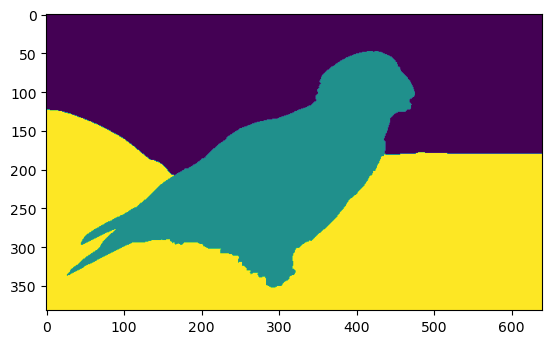

In [7]:
final_segmentation = np.argmax(segmenter.theta_history[-1], axis = 0).transpose(1, 0)
plt.imshow(final_segmentation)

In [14]:
segmenter.primal_energy_history[-1] - segmenter.dual_energy_history[-1]

88.61604091552636

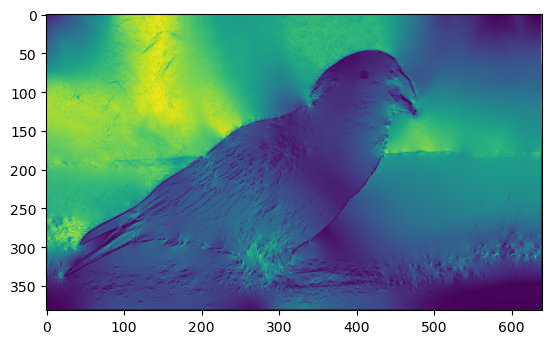

In [8]:
dual_vars = np.sum(segmenter.xi**2, axis = 0)
dual_vars = np.sqrt(dual_vars).transpose(2, 1, 0)
dual_vars = np.mean(dual_vars, axis = 2)
plt.imshow(dual_vars)

Text(0.5, 1.0, 'Dual energy history')

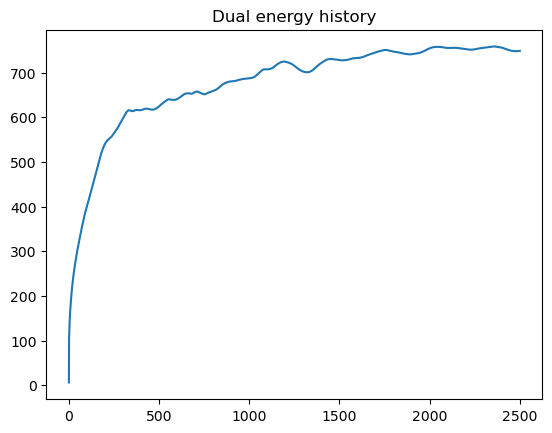

In [9]:
fig, ax = plt.subplots()

ax.plot(segmenter.dual_energy_history)
ax.set_title("Dual energy history")

Text(0.5, 1.0, 'Primal energy history')

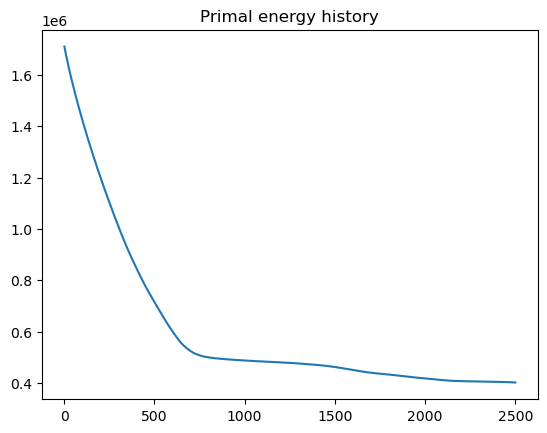

In [10]:
fig, ax = plt.subplots()
ax.plot(segmenter.energy_history)
ax.set_title("Primal energy history")


C:\Users\lollo\AppData\Local\Temp\ipykernel_3780\1159812170.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


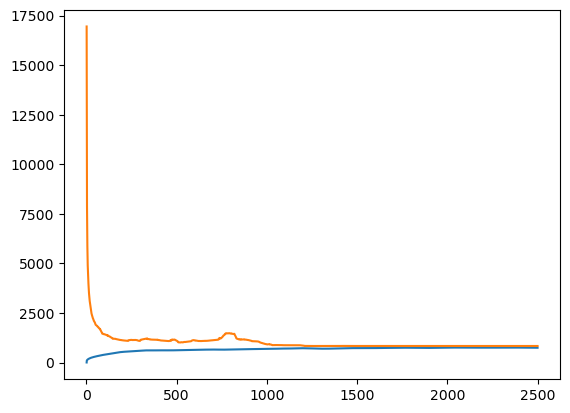

In [11]:
fig, ax = plt.subplots()

im_dual = ax.plot(segmenter.dual_energy_history)
im_primal = ax.plot(segmenter.primal_energy_history)
fig.show()

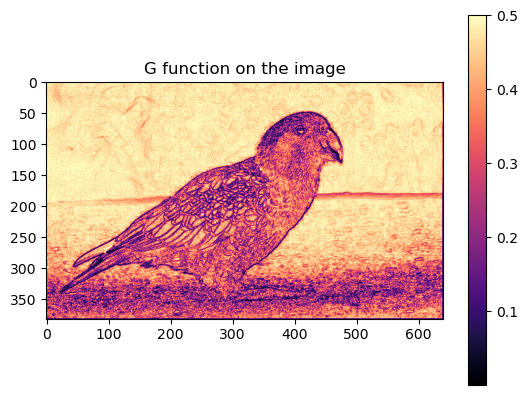

In [12]:
im_arr = sample_image_kea.get_image_array()
im_shape = sample_image_kea.get_image_shape()
segmenter.utils.make_derivative_matrix(*im_shape[1::-1])
#half_g = segmenter.utils.init_halfg(im_arr)
half_g = segmenter.halfg
_, w, h = half_g.shape
half_g = half_g.reshape(w, h)
half_g.shape
vmin = np.min(half_g)
vmax = np.max(half_g)

fig, ax = plt.subplots()

im1 = ax.imshow(half_g.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
ax.set_title("G function on the image")
fig.colorbar(im1, ax=ax, label='')

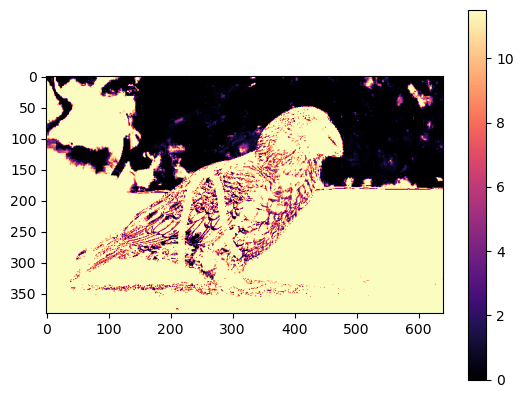

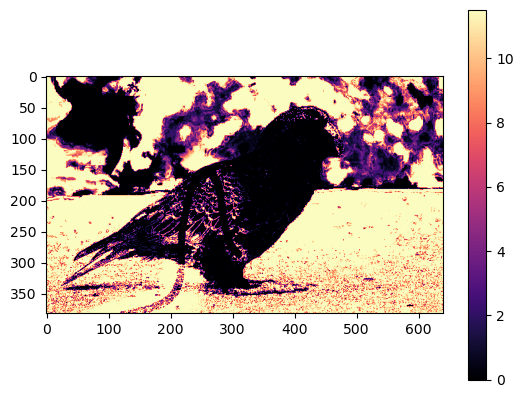

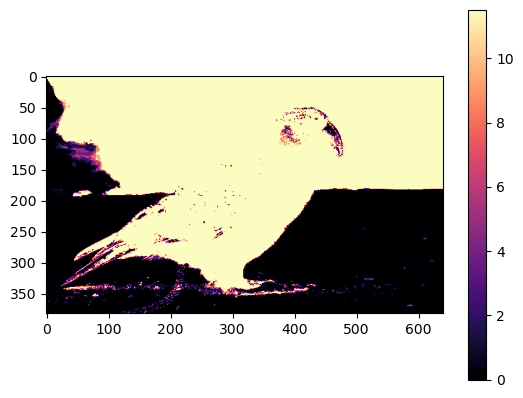

In [13]:
for likelihood in segmenter.fitted_likelihood:
    fig, ax = plt.subplots()
    vmin = np.min(likelihood)
    vmax = np.max(likelihood)
    im1 = ax.imshow(likelihood.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    fig.colorbar(im1, ax=ax, label='')